<div>
<h1 align="center">Stocks project</h1>
<h2 align="center"> By: Hans Michael Célestin </h2>
<br>

</div>

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import scipy.stats as pearsonr
from pandas_datareader import data, wb, DataReader
import numpy as np
from datetime import datetime
from __future__ import division


In [16]:
tech_list= ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [17]:
end = datetime.now()
start = datetime(end.year-1,end.month, end.day)

In [26]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [30]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,117.398014,114.350336,115.974259,115.909407,1.284065e+08,115.472872
std,16.766208,16.327330,16.694883,16.502538,5.254606e+07,16.600907
min,76.974998,75.052498,75.087502,76.927498,4.408510e+07,76.412621
25%,111.989998,108.387497,109.720001,110.062500,9.032920e+07,109.325851
50%,121.430000,118.570000,120.059998,119.989998,1.129663e+08,119.786530
75%,129.720001,126.760002,128.500000,127.900002,1.537666e+08,127.683121
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [32]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-05-14 to 2021-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 23.8 KB


<AxesSubplot:xlabel='Date'>

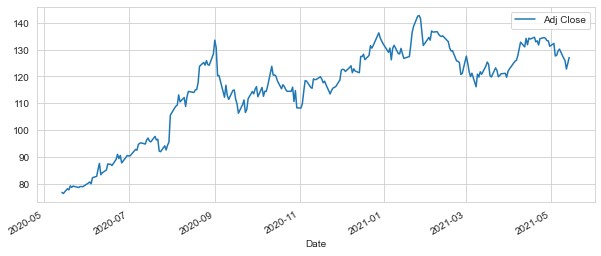

In [35]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

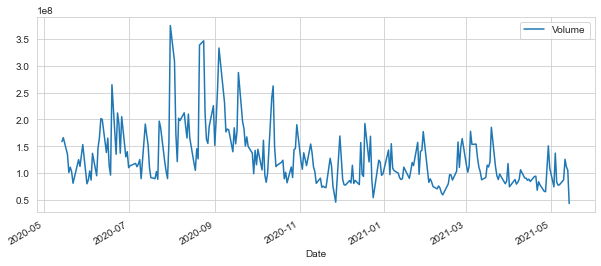

In [38]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))



In [46]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name ='MA for %s days'%(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

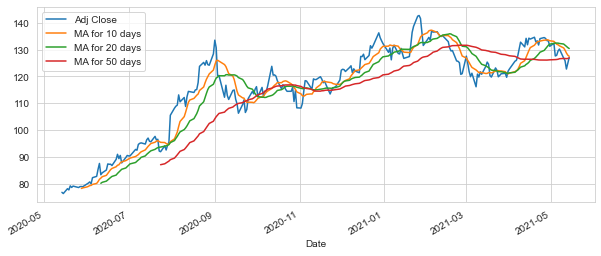

In [49]:
AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

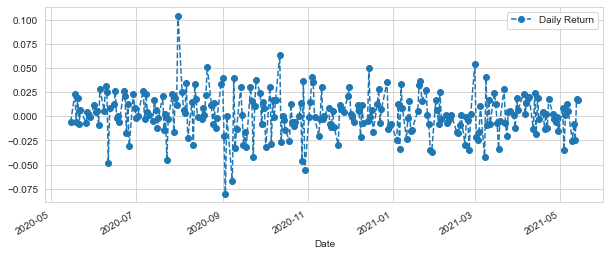

In [52]:
AAPL['Daily Return'] =AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\hansm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

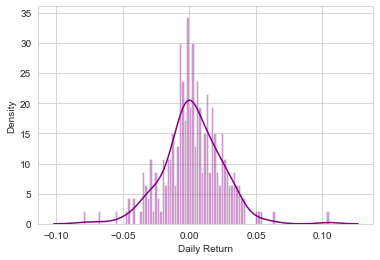

In [56]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

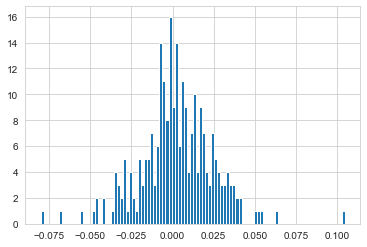

In [58]:
AAPL['Daily Return'].hist(bins=100)

In [61]:
closing_df =DataReader(tech_list,'yahoo',start,end)['Adj Close']


In [63]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-14,76.867065,1356.130005,178.713898,2388.850098
2020-05-15,76.412621,1373.189941,181.317429,2409.780029
2020-05-18,78.212997,1383.939941,183.049850,2426.260010
2020-05-19,77.761040,1373.484985,181.782730,2449.330078
2020-05-20,79.273354,1406.719971,184.304169,2497.939941
...,...,...,...,...
2021-05-10,126.849998,2341.659912,247.179993,3190.489990
2021-05-11,125.910004,2308.760010,246.229996,3223.909912
2021-05-12,122.769997,2239.080078,239.000000,3151.939941


In [65]:
tech_rets = closing_df.pct_change()

In [67]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-14,NaN,NaN,NaN,NaN
2020-05-15,-0.005912,0.012580,0.014568,0.008762
2020-05-18,0.023561,0.007828,0.009555,0.006839
2020-05-19,-0.005779,-0.007554,-0.006922,0.009508
2020-05-20,0.019448,0.024198,0.013871,0.019846
...,...,...,...,...
2021-05-10,-0.025805,-0.023775,-0.020914,-0.030721
2021-05-11,-0.007410,-0.014050,-0.003843,0.010475
2021-05-12,-0.024939,-0.030181,-0.029363,-0.022324


C:\Users\hansm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


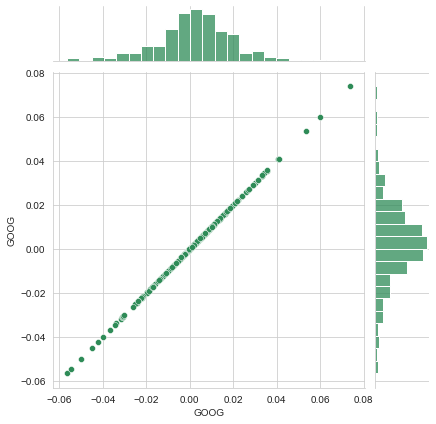

In [87]:
sns.jointplot('GOOG','GOOG',tech_rets, kind ='scatter',color='seagreen')

C:\Users\hansm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


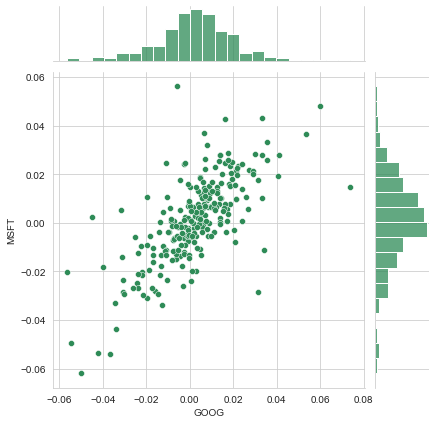

In [88]:
sns.jointplot('GOOG','MSFT',tech_rets, kind ='scatter',color='seagreen')



In [89]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-14,NaN,NaN,NaN,NaN
2020-05-15,-0.005912,0.012580,0.014568,0.008762
2020-05-18,0.023561,0.007828,0.009555,0.006839
2020-05-19,-0.005779,-0.007554,-0.006922,0.009508
2020-05-20,0.019448,0.024198,0.013871,0.019846


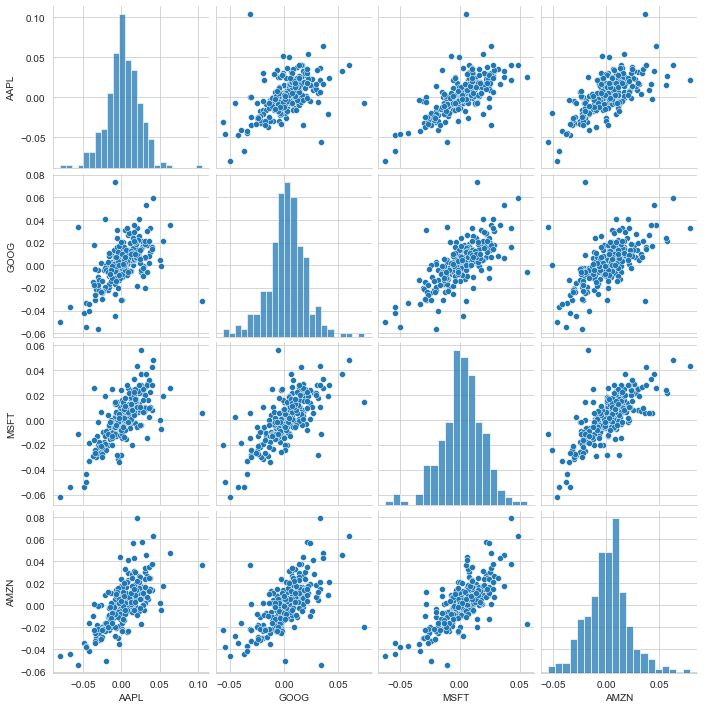

In [92]:
sns.pairplot(tech_rets.dropna())

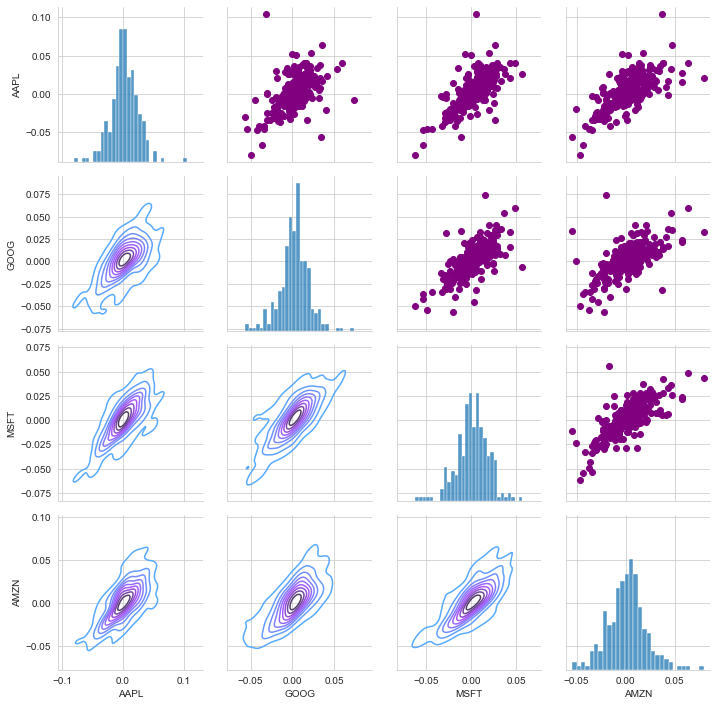

In [109]:
returns_fig =sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(sns.histplot,bins=30)

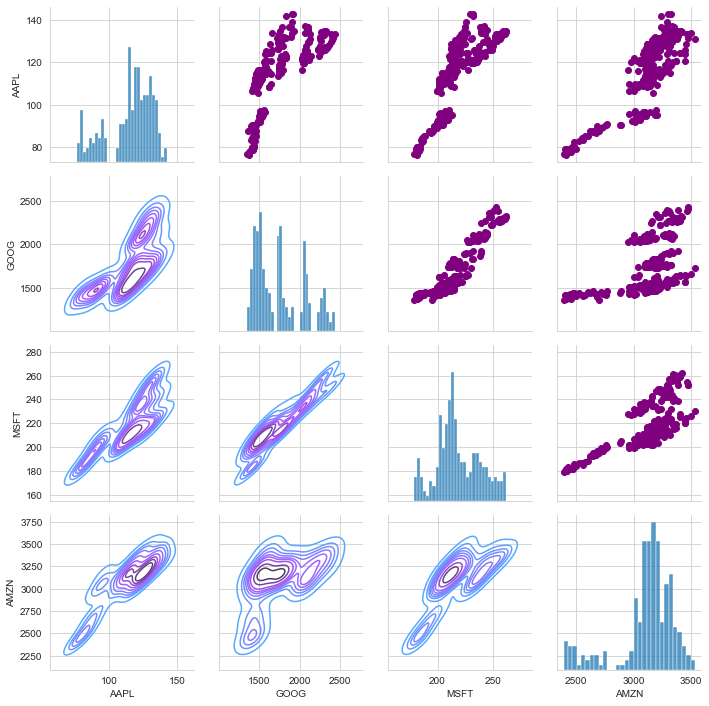

In [112]:
returns_fig =sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(sns.histplot,bins=30)

Symbols      AAPL      GOOG      MSFT      AMZN
Symbols                                        
AAPL     1.000000  0.515486  0.697216  0.693929
GOOG     0.515486  1.000000  0.706202  0.627098
MSFT     0.697216  0.706202  1.000000  0.744569
AMZN     0.693929  0.627098  0.744569  1.000000


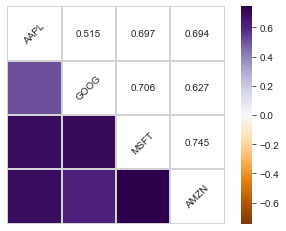

In [131]:
# Compute the correlation matrix
corr = tech_rets.dropna().corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,(i+0.5), corr.columns[i], ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s,
            ha="center", va="center")
ax.axis("off")
plt.show()

Symbols      AAPL      GOOG      MSFT      AMZN
Symbols                                        
AAPL     1.000000  0.728768  0.830470  0.865277
GOOG     0.728768  1.000000  0.930805  0.539084
MSFT     0.830470  0.930805  1.000000  0.743600
AMZN     0.865277  0.539084  0.743600  1.000000


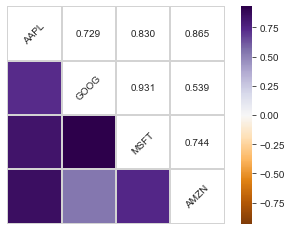

In [132]:
# Compute the correlation matrix
corr = closing_df.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,(i+0.5), corr.columns[i], ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s,
            ha="center", va="center")
ax.axis("off")
plt.show()